In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Part 1 - Data Preprocessing

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 9 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4 images belonging to 2 classes.


Part 2 - Building CNN

In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Part 3 - Training CNN

In [10]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
trained_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4444 - loss: 0.8524 - val_accuracy: 0.5000 - val_loss: 1.0396
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.5556 - loss: 0.7663 - val_accuracy: 0.5000 - val_loss: 0.7969
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5556 - loss: 0.6018 - val_accuracy: 0.5000 - val_loss: 0.5644
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7778 - loss: 0.4662 - val_accuracy: 1.0000 - val_loss: 0.5170
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 1.0000 - loss: 0.4543 - val_accuracy: 1.0000 - val_loss: 0.4464
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 1.0000 - loss: 0.3716 - val_accuracy: 1.0000 - val_loss: 0.3351
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 1.0000 - loss: 0.2568 - val_accuracy: 1.0000 - val_loss: 0.2656
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 1.0000 - loss: 0.1557 - val_accuracy: 1.0000 - val_loss: 0.

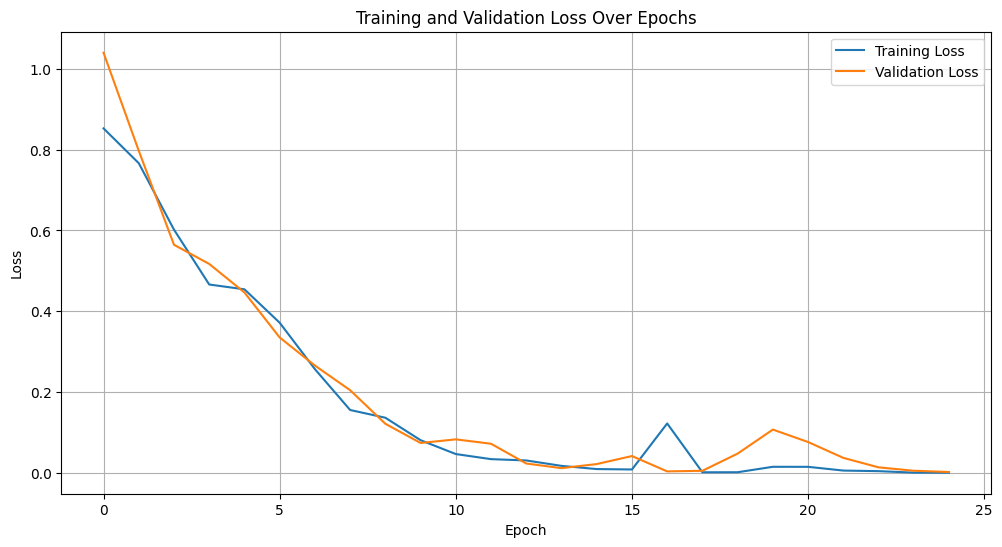

In [12]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

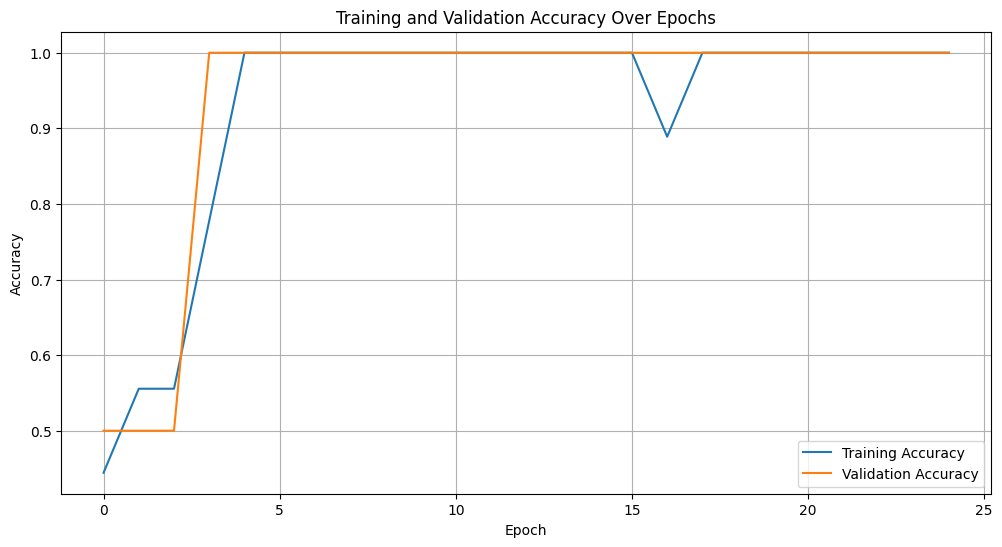

In [13]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import numpy as np
from keras.preprocessing import image

# Loading and preparing the image
test_image = image.load_img('/content/drive/MyDrive/Dataset/Testing/Pokemon2 - Raichu/raichu4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# Predicting the result
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 0:
    prediction = 'pikachu'
else:
    prediction = 'raichu'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
raichu
